# Credit Risk Modelling – Probability of Default (PD)

1. **Setup & Libraries**  
Import Python libraries for data handling, modelling, and evaluation.

2. **Generate Mock Data**  
Create a synthetic loan dataset with features such as loan amount, income, credit score, and age, plus a default indicator.

3. **Train-Test Split**  
Split the dataset into training and testing sets to evaluate model performance.

4. **Logistic Regression Model**  
Fit a logistic regression model to estimate the probability of default (PD).

5. **Model Evaluation**  
- Classification metrics (precision, recall, F1-score)  
- Area Under the Curve (AUC) score  
- ROC curve visualisation


In [1]:
%pip install numpy pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(16) # Fixed seed for reproducibility
n = 1000

In [4]:
# Dataframe with mock loan data
# Includes:
#   - Normally distributed loan amounts, income, and credit score
#   - Random ages between 21 and 65
#   - A 10% chance of defaulting
df = pd.DataFrame({
    'loan_amount': np.random.normal(50000, 15000, n), 
    'income': np.random.normal(70000, 20000, n), 
    'credit_score': np.random.normal(650, 50, n),
    'age': np.random.randint(21, 65, n), 
    'default': np.random.binomial(1, 0.1, n) 
})

In [5]:
# Split data into features (X) and target variables (y)
X = df[['loan_amount', 'income', 'credit_score', 'age']] 
y = df['default']  

In [ ]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=16
)

In [ ]:
# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=2000, random_state=16)
model.fit(X_train, y_train) 

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,66
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [8]:
# Make predictions
predict_probability_of_default = model.predict_proba(X_test)[:, 1]    # (class 1)
predict_binary_outcome = model.predict(X_test)                        # (0 or 1)

In [9]:
# Evaluate model performance
print(classification_report(y_test, predict_binary_outcome))                      # Print precision, recall, f1-score, etc.
print("AUC Score:", roc_auc_score(y_test, predict_probability_of_default))        # Print Area Under the Curve (AUC) score

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       187
           1       0.00      0.00      0.00        13

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.87      0.94      0.90       200

AUC Score: 0.4084738790621144


/home/veer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/veer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/veer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


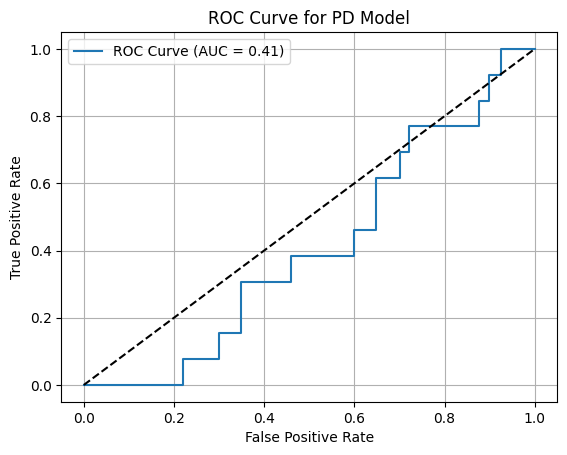

In [10]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, predict_probability_of_default)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc_score(y_test, predict_probability_of_default))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for PD Model")
plt.legend()
plt.grid(True)
plt.show()